In [2]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

In [3]:
# client 1
import glob,os,cv2
hand_negative=glob.glob('./archive/finaldata/train_final/XR_HAND/negative/*.png')
hand_positive=glob.glob('./archive/finaldata/train_final/XR_HAND/positive/*.png')

hand_negative_t=glob.glob('./archive/finaldata/valid_final/XR_HAND/negative/*.png')
hand_positive_t=glob.glob('./archive/finaldata/valid_final/XR_HAND/positive/*.png')

In [117]:
# client 2
import glob,os,cv2
shoulder_negative=glob.glob('./archive/finaldata/train_final/XR_SHOULDER/negative/*.png')
shoulder_positive=glob.glob('./archive/finaldata/train_final/XR_SHOULDER/positive/*.png')

shoulder_negative_t=glob.glob('./archive/finaldata/valid_final/XR_SHOULDER/negative/*.png')
shoulder_positive_t=glob.glob('./archive/finaldata/valid_final/XR_SHOULDER/positive/*.png')

In [4]:
data=[]
label=[]
ii=0
for i in hand_negative:
    while(ii<1500):
        a=cv2.imread(i,1)
        a=cv2.resize(a,(64,64))
        data.append(a)
        label.append(0)
        ii=ii+1
for i in hand_positive:
    a=cv2.imread(i,1)
    a=cv2.resize(a,(64,64))
    data.append(a)
    label.append(1)
for i in hand_negative_t:
        a=cv2.imread(i,1)
        a=cv2.resize(a,(64,64))
        data.append(a)
        label.append(0)
for i in hand_positive_t:
    a=cv2.imread(i,1)
    a=cv2.resize(a,(64,64))
    data.append(a)
    label.append(1)

In [5]:
data=np.array(data)
label=np.array(label)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,label,stratify=label,test_size=0.2)

In [123]:
base_model = tf.keras.applications.EfficientNetB3(weights='imagenet', input_shape=(64,64,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Dense(1, activation='sigmoid'))
model.summary()
#  ------------------------------------------------------------------------------

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# model = Sequential()

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1, activation='sigmoid'))

# model.summary()



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ ?                           │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_6 (GaussianNoise)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_7 (GaussianNoise)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,783,535 (41.14 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 10,783,535 (41.14 MB)

In [124]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall','AUC'])

In [125]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
lrp=ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=2)
filepath='stage-2_model.keras'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
call=[checkpoint,lrp]
history = model.fit(
    x_train,y_train,
    epochs=5,
    validation_data=(x_test,y_test),
    steps_per_epoch= 10,
    callbacks=call
    )

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - AUC: 0.8237 - Precision: 0.8691 - Recall: 0.8079 - accuracy: 0.7802 - loss: 0.4880
Epoch 1: val_accuracy improved from -inf to 0.94787, saving model to stage-2_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 70s 5s/step - AUC: 0.8319 - Precision: 0.8737 - Recall: 0.8179 - accuracy: 0.7896 - loss: 0.4721 - val_AUC: 0.9352 - val_Precision: 0.9450 - val_Recall: 0.9843 - val_accuracy: 0.9479 - val_loss: 0.2426 - learning_rate: 0.0010
Epoch 2/5


D:\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.94787
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - AUC: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_AUC: 0.9352 - val_Precision: 0.9450 - val_Recall: 0.9843 - val_accuracy: 0.9479 - val_loss: 0.2426 - learning_rate: 0.0010
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.9393 - Precision: 0.9367 - Recall: 0.9915 - accuracy: 0.9461 - loss: 0.1970
Epoch 3: val_accuracy improved from 0.94787 to 0.95108, saving model to stage-2_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - AUC: 0.9394 - Precision: 0.9369 - Recall: 0.9915 - accuracy: 0.9462 - loss: 0.1966 - val_AUC: 0.9429 - val_Precision: 0.9452 - val_Recall: 0.9888 - val_accuracy: 0.9511 - val_loss: 0.1942 - learning_rate: 0.0010
Epoch 4/5

Epoch 4: val_accuracy did not improve from 0.95108
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - AUC: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0000e+00 - loss: 0.

In [126]:
model.evaluate(x_train,y_train)

156/156 ━━━━━━━━━━━━━━━━━━━━ 41s 260ms/step - AUC: 0.9507 - Precision: 0.9353 - Recall: 0.9928 - accuracy: 0.9451 - loss: 0.1883


[0.1776527762413025,
 0.9488362669944763,
 0.9379145503044128,
 0.9940944910049438,
 0.9574422836303711]

In [127]:
model.evaluate(x_test,y_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 299ms/step - AUC: 0.9480 - Precision: 0.9488 - Recall: 0.9950 - accuracy: 0.9581 - loss: 0.1666


[0.18211789429187775,
 0.9526864290237427,
 0.9453375935554504,
 0.9910112619400024,
 0.9426336288452148]

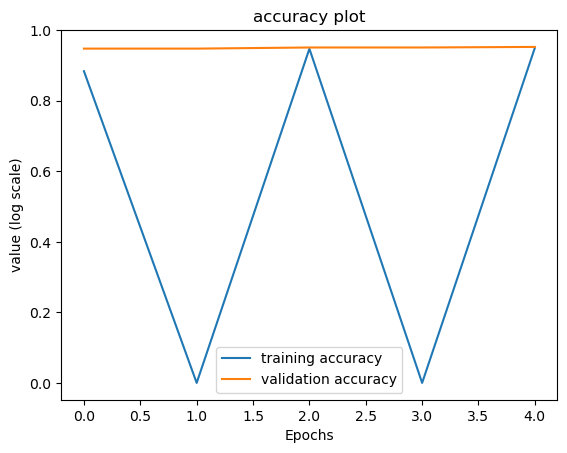

In [129]:
import matplotlib.pyplot as plt
plt.title('accuracy plot')
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

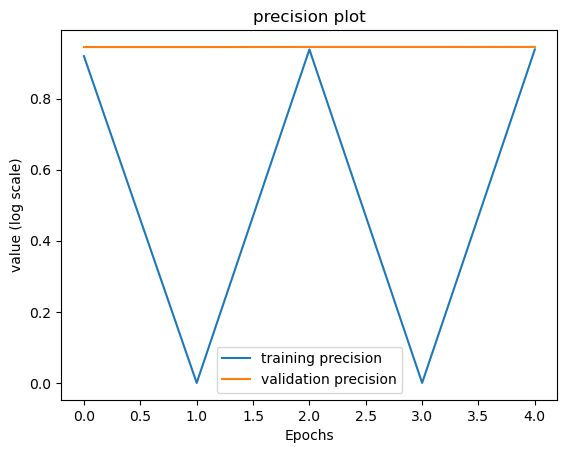

In [130]:
plt.title('precision plot')
plt.plot(history.history['Precision'],label='training precision')
plt.plot(history.history['val_Precision'],label='validation precision')
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

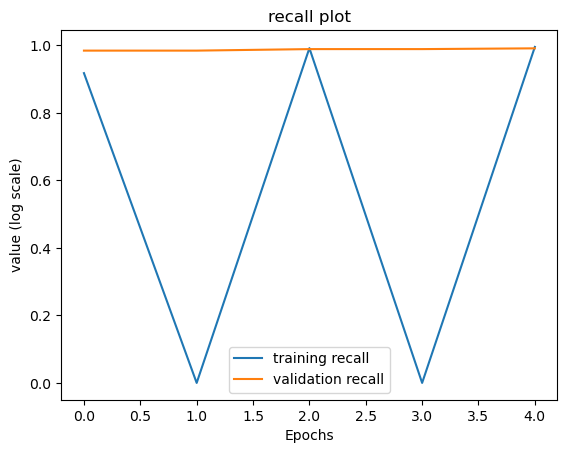

In [131]:
plt.title('recall plot')
plt.plot(history.history['Recall'],label='training recall')
plt.plot(history.history['val_Recall'],label='validation recall')
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

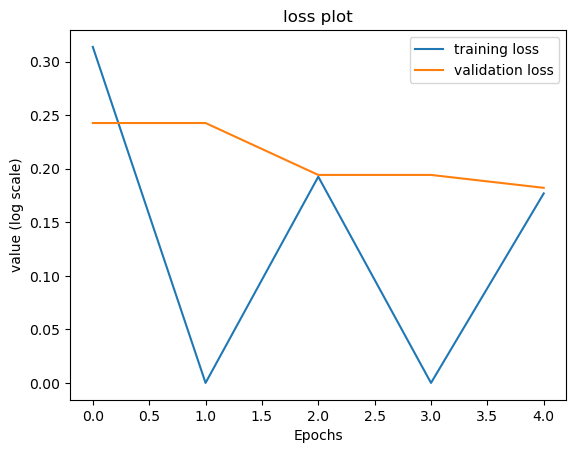

In [132]:
plt.title('loss plot')
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

In [113]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
train=model.predict(x_train)
val=model.predict(x_test)
train=train>=0.5
val=val>=0.5
print(classification_report(val,y_test))

214/214 ━━━━━━━━━━━━━━━━━━━━ 61s 266ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 243ms/step
              precision    recall  f1-score   support

       False       0.87      0.74      0.80      1305
        True       0.44      0.65      0.52       401

    accuracy                           0.72      1706
   macro avg       0.65      0.69      0.66      1706
weighted avg       0.77      0.72      0.74      1706



In [136]:
from keras.models import load_model

# Assuming you have already created and trained your Keras model
# Replace 'model' with the name of your trained model
model.save('model1.keras')  # Save the entire model to a HDF5 file
# model.save('model1.h5')  # Save the entire model to a HDF5 file

# To load the saved model later
loaded_model = load_model('model1.keras')
loaded_model.summary()

D:\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 2, 2, 1536)          │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_6 (GaussianNoise)     │ (None, 2, 2, 1536)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_7 (GaussianNoise)     │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,426,675 (47.40 MB)

 Trainable params: 820,993 (3.13 MB)

 Non-trainable params: 10,784,687 (41.14 MB)

 Optimizer params: 820,995 (3.13 MB)

In [120]:
## Client 2
data=[]
label=[]
ii=0
for i in shoulder_negative:
    while(ii<1500):
        a=cv2.imread(i,1)
        a=cv2.resize(a,(64,64))
        data.append(a)
        label.append(0)
        ii=ii+1
for i in shoulder_positive:
    a=cv2.imread(i,1)
    a=cv2.resize(a,(64,64))
    data.append(a)
    label.append(1)
for i in shoulder_negative_t:
        a=cv2.imread(i,1)
        a=cv2.resize(a,(64,64))
        data.append(a)
        label.append(0)
for i in shoulder_positive_t:
    a=cv2.imread(i,1)
    a=cv2.resize(a,(64,64))
    data.append(a)
    label.append(1)

In [121]:
data=np.array(data)
label=np.array(label)

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,label,stratify=label,test_size=0.2)

In [133]:
for layer in base_model.layers:
    layer.trainable=False
model2 = Sequential()
model2.add(base_model)
model2.add(GaussianNoise(0.25))
model2.add(GlobalAveragePooling2D())
model2.add(Dense(512,activation='relu'))
model2.add(BatchNormalization())
model2.add(GaussianNoise(0.25))
model2.add(Dropout(0.25))
model2.add(Dense(64,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.15))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 2, 2, 1536)          │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_8 (GaussianNoise)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_9 (GaussianNoise)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,783,535 (41.14 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 10,783,535 (41.14 MB)

In [137]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall','AUC'])

In [138]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
lrp=ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=2)
filepath='stage-2_model2.keras'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
call=[checkpoint,lrp]
history = model2.fit(
    x_train,y_train,
    epochs=10,
    validation_data=(x_test,y_test),
    steps_per_epoch= 10,
    callbacks=call
    )

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - AUC: 0.8187 - Precision: 0.8731 - Recall: 0.7885 - accuracy: 0.7717 - loss: 0.5048
Epoch 1: val_accuracy improved from -inf to 0.95108, saving model to stage-2_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 5s/step - AUC: 0.8268 - Precision: 0.8775 - Recall: 0.7989 - accuracy: 0.7811 - loss: 0.4901 - val_AUC: 0.9365 - val_Precision: 0.9452 - val_Recall: 0.9888 - val_accuracy: 0.9511 - val_loss: 0.1862 - learning_rate: 0.0010
Epoch 2/10


D:\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.95108
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - AUC: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_AUC: 0.9365 - val_Precision: 0.9452 - val_Recall: 0.9888 - val_accuracy: 0.9511 - val_loss: 0.1862 - learning_rate: 0.0010
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - AUC: 0.9359 - Precision: 0.9388 - Recall: 0.9896 - accuracy: 0.9461 - loss: 0.2059
Epoch 3: val_accuracy improved from 0.95108 to 0.95509, saving model to stage-2_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - AUC: 0.9360 - Precision: 0.9388 - Recall: 0.9896 - accuracy: 0.9461 - loss: 0.2055 - val_AUC: 0.9468 - val_Precision: 0.9455 - val_Recall: 0.9944 - val_accuracy: 0.9551 - val_loss: 0.1854 - learning_rate: 0.0010
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.95509
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 984ms/step - AUC: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0000e+00 - lo

In [139]:
print(model2.evaluate(x_train,y_train))
print(model2.evaluate(x_test,y_test))

156/156 ━━━━━━━━━━━━━━━━━━━━ 41s 262ms/step - AUC: 0.9537 - Precision: 0.9355 - Recall: 0.9967 - accuracy: 0.9478 - loss: 0.1922
[0.18143562972545624, 0.9514446258544922, 0.9381279945373535, 0.9977502822875977, 0.9565823078155518]
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 269ms/step - AUC: 0.9509 - Precision: 0.9489 - Recall: 0.9973 - accuracy: 0.9597 - loss: 0.1625
[0.1761060208082199, 0.9558941721916199, 0.9455709457397461, 0.9955056309700012, 0.9468228220939636]


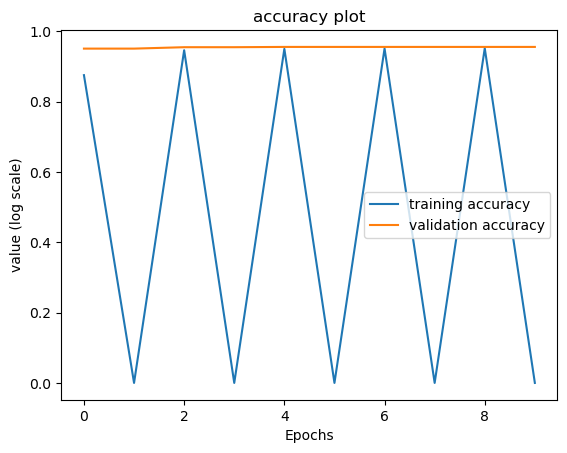

In [142]:
import matplotlib.pyplot as plt
plt.title('accuracy plot')
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

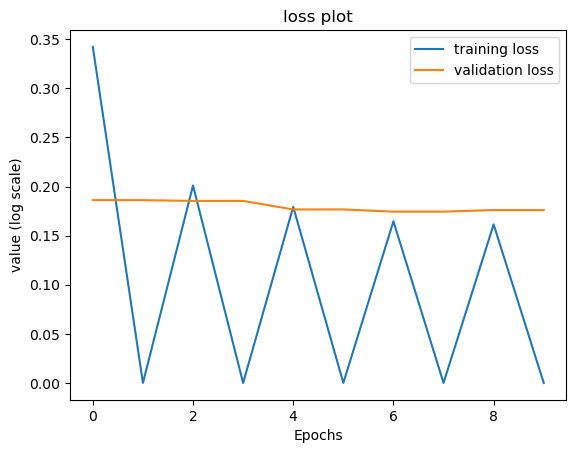

In [143]:
plt.title('loss plot')
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

In [144]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
train=model2.predict(x_train)
val=model2.predict(x_test)
train=train>=0.5
val=val>=0.5
print(classification_report(val,y_test))

156/156 ━━━━━━━━━━━━━━━━━━━━ 43s 252ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step
              precision    recall  f1-score   support

       False       0.86      0.99      0.92       310
        True       1.00      0.95      0.97       937

    accuracy                           0.96      1247
   macro avg       0.93      0.97      0.94      1247
weighted avg       0.96      0.96      0.96      1247



In [145]:
from keras.models import load_model

# Assuming you have already created and trained your Keras model
# Replace 'model' with the name of your trained model
model.save('model2.keras')  # Save the entire model to a HDF5 file
model.save('model2.h5')  # Save the entire model to a HDF5 file

# To load the saved model later
loaded_model = load_model('model2.keras')
loaded_model.summary()

D:\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 2, 2, 1536)          │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_6 (GaussianNoise)     │ (None, 2, 2, 1536)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_7 (GaussianNoise)     │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,426,675 (47.40 MB)

 Trainable params: 820,993 (3.13 MB)

 Non-trainable params: 10,784,687 (41.14 MB)

 Optimizer params: 820,995 (3.13 MB)

## Aggregated Model Training

In [17]:
## Loading aggregated model
aggregated_model = load_model('aggregated_model.keras')  # Save the entire model to a HDF5 file
aggregated_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 2, 2, 1536)          │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_6 (GaussianNoise)     │ (None, 2, 2, 1536)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_7 (GaussianNoise)     │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,426,675 (47.40 MB)

 Trainable params: 820,993 (3.13 MB)

 Non-trainable params: 10,784,687 (41.14 MB)

 Optimizer params: 820,995 (3.13 MB)

In [18]:
aggregated_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall','AUC'])

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
lrp=ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=2)
filepath='stage-agg_model_agg.keras'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
call=[checkpoint,lrp]
history = aggregated_model.fit(
    x_train,y_train,
    epochs=20,
    validation_data=(x_test,y_test),
    steps_per_epoch= 10,
    callbacks=call
    )

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - AUC: 0.7763 - Precision: 0.7023 - Recall: 0.7816 - accuracy: 0.7253 - loss: 0.6610
Epoch 1: val_accuracy improved from -inf to 0.92163, saving model to stage-agg_model_agg.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - AUC: 0.7878 - Precision: 0.7115 - Recall: 0.7935 - accuracy: 0.7366 - loss: 0.6399 - val_AUC: 0.9361 - val_Precision: 0.8668 - val_Recall: 0.9910 - val_accuracy: 0.9216 - val_loss: 0.3090 - learning_rate: 0.0010
Epoch 2/20

Epoch 2: val_accuracy did not improve from 0.92163
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 578ms/step - AUC: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_AUC: 0.9361 - val_Precision: 0.8668 - val_Recall: 0.9910 - val_accuracy: 0.9216 - val_loss: 0.3090 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - AUC: 0.9432 - Precision: 0.8675 - Recall: 0.9915 - accuracy: 0.9217 - loss: 0.2568
Epoch 3: val_accuracy improved from 0.92163 to

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.9649 - Precision: 0.8718 - Recall: 0.9969 - accuracy: 0.9284 - loss: 0.2052
Epoch 19: val_accuracy did not improve from 0.92453
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - AUC: 0.9647 - Precision: 0.8721 - Recall: 0.9966 - accuracy: 0.9284 - loss: 0.2054 - val_AUC: 0.9445 - val_Precision: 0.8695 - val_Recall: 0.9940 - val_accuracy: 0.9245 - val_loss: 0.2352 - learning_rate: 1.0000e-05
Epoch 20/20

Epoch 20: val_accuracy did not improve from 0.92453
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 773ms/step - AUC: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_AUC: 0.9445 - val_Precision: 0.8695 - val_Recall: 0.9940 - val_accuracy: 0.9245 - val_loss: 0.2352 - learning_rate: 1.0000e-05


In [14]:
print(aggregated_model.evaluate(x_train,y_train))
print(aggregated_model.evaluate(x_test,y_test))

87/87 ━━━━━━━━━━━━━━━━━━━━ 26s 297ms/step - AUC: 0.9761 - Precision: 0.8619 - Recall: 0.9973 - accuracy: 0.9221 - loss: 0.2005
[0.19520805776119232, 0.9263157844543457, 0.8692257404327393, 0.9985052347183228, 0.9780031442642212]
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - AUC: 0.9341 - Precision: 0.8567 - Recall: 0.9984 - accuracy: 0.9204 - loss: 0.2435
[0.22608892619609833, 0.9259796738624573, 0.8697916865348816, 0.9970149397850037, 0.9483472108840942]


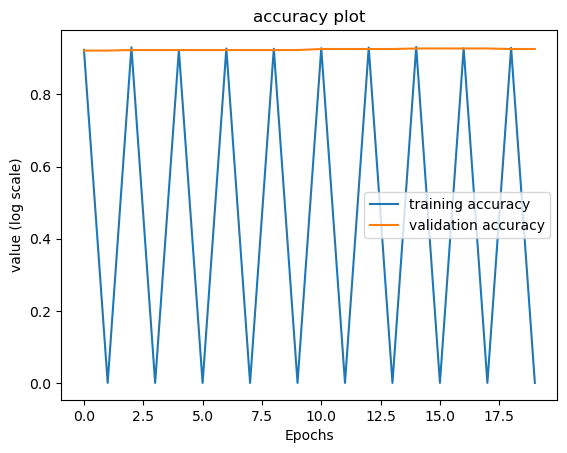

In [15]:
import matplotlib.pyplot as plt
plt.title('accuracy plot')
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

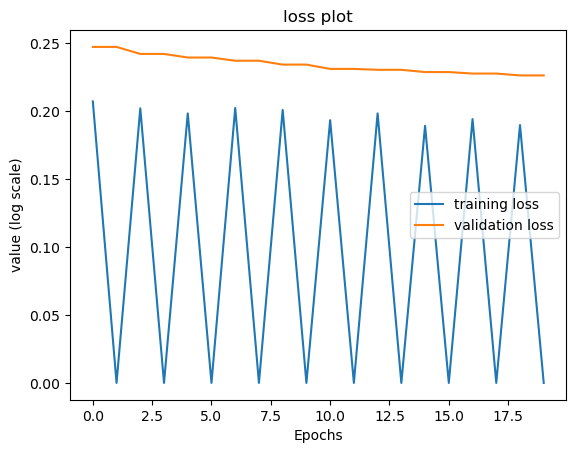

In [16]:
plt.title('loss plot')
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();